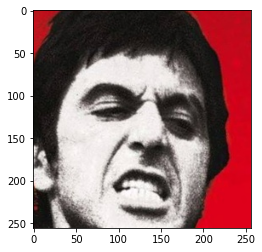

In [8]:
import cv2
import matplotlib.pyplot as plt
import torch


#img = cv2.imread('data/celeba/celeba/img_align_celeba/000001.jpg')
img = cv2.imread("/home/sirius/rect_affin.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
batch = torch.Tensor(img).permute(2, 0, 1)[None, ...]
batch.shape

torch.Size([1, 3, 256, 256])

In [10]:
from cface.models import ArcFaceExtractor

model = ArcFaceExtractor(n_classes=10178)
ckpt = torch.load('models/arcface0.1-e2.pt')
model.load_state_dict(ckpt['model_state_dict'])
result = model.forward(batch)
print(result[0].shape)

torch.Size([512])


# Landmarks

In [24]:
import numpy as np

landmarks_path = './data/celeba/celeba/list_landmarks_align_celeba.txt'
landmarks_file = open(landmarks_path)
info = landmarks_file.readline().split()
info = landmarks_file.readline().split()

landmarks = dict()
info = landmarks_file.readline().split()
filename = info.pop(0)
info = list(map(int, info))
landmarks[filename] = np.array([
    [info[0], info[1]],
    [info[2], info[3]],
    [info[4], info[5]],
    [info[6], info[7]],
    [info[8], info[9]],
])

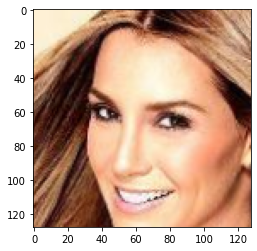

In [201]:
import cv2
import numpy as np
import torch


def make_batch(filename='data/celeba/celeba/img_align_celeba/000001.jpg'):
    landmarks_path = './data/celeba/celeba/list_landmarks_align_celeba.txt'
    idx = int(filename.split('/')[-1][:-4])
    landmarks_file = open(landmarks_path)
    landmarks_file.readline()
    landmarks_file.readline()
    for i in range(idx - 1):
        landmarks_file.readline()

    info = landmarks_file.readline().split()
    info.pop(0)
    info = list(map(int, info))
    landmarks = np.array([
        [info[0], info[1]],
        [info[2], info[3]],
        [info[4], info[5]],
        [info[6], info[7]],
        [info[8], info[9]],
    ])
    
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = LandmarksProcessor.cut_face(img, box=None, ldm=landmarks, resize=128)
    plt.imshow(img)
    batch = torch.Tensor(img).permute(2, 0, 1)[None, ...]
    
    return batch


a = make_batch()

In [37]:
print(torch.abs(result_1 - result_2).sum())
print(torch.abs(result_1 - result_3).sum())
print(torch.abs(result_3 - result_2).sum())

tensor(90.3557, grad_fn=<SumBackward0>)
tensor(95.4120, grad_fn=<SumBackward0>)
tensor(83.8908, grad_fn=<SumBackward0>)


1.2839730978012085
1.3349484205245972
1.2961212396621704
1.2259992361068726
1.3359259366989136
1.3286818265914917
-----------
1.3676199913024902
1.2080116271972656
1.352064847946167


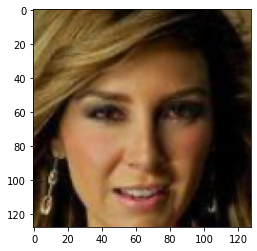

In [203]:
import torch.nn.functional as F
from cface.models import ArcFaceExtractor

model = ArcFaceExtractor(n_classes=10178)
ckpt = torch.load('models/arcface0.2-e100.pt')
model.load_state_dict(ckpt['model_state_dict'])

batches = []
for i in range(1, 10):
    batches.append(
        make_batch(f'data/celeba/celeba/img_align_celeba/00000{i}.jpg')
    )

batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/000404.jpg')
)
batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/003415.jpg')
)
batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/090937.jpg')
)
batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/018062.jpg')
)


results = []
for i, b in enumerate(batches):
    x = model.extractor(b)
    x = F.normalize(x)[0]
    results.append(x)

for i in range(1, 7):
    print(lin.norm((results[0] - results[i]).detach().numpy()))

print('-----------')
for i in range(-3, 0):
    print(lin.norm((results[0] - results[i]).detach().numpy()))

tensor(102.1872, grad_fn=<SumBackward0>)
tensor(93.4148, grad_fn=<SumBackward0>)
tensor(77.7436, grad_fn=<SumBackward0>)
tensor(90.3579, grad_fn=<SumBackward0>)
tensor(81.2855, grad_fn=<SumBackward0>)
tensor(97.2525, grad_fn=<SumBackward0>)
-----------
tensor(73.4680, grad_fn=<SumBackward0>)
tensor(86.1766, grad_fn=<SumBackward0>)
tensor(89.8171, grad_fn=<SumBackward0>)
tensor(75.0294, grad_fn=<SumBackward0>)


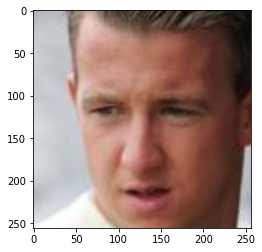

In [72]:
from cface.models import ArcFaceExtractor

model = ArcFaceExtractor(n_classes=10178)
ckpt = torch.load('models/arcface0.1-e100.pt')
model.load_state_dict(ckpt['model_state_dict'])

batches = []
batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/000023.jpg')
)

for i in range(1, 10):
    batches.append(
        make_batch(f'data/celeba/celeba/img_align_celeba/00000{i}.jpg')
    )

batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/006439.jpg')
)
batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/004506.jpg')
)
batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/014042.jpg')
)
batches.append(
    make_batch(f'data/celeba/celeba/img_align_celeba/023004.jpg')
)


results = []
for i, b in enumerate(batches):
    results.append(model.extractor(b)[0])

print((results[0] - results[1]).abs().sum())
print((results[0] - results[2]).abs().sum())
print((results[0] - results[3]).abs().sum())
print((results[0] - results[4]).abs().sum())
print((results[0] - results[5]).abs().sum())
print((results[0] - results[6]).abs().sum())
print('-----------')
print((results[0] - results[-1]).abs().sum())
print((results[0] - results[-2]).abs().sum())
print((results[0] - results[-3]).abs().sum())
print((results[0] - results[-4]).abs().sum())

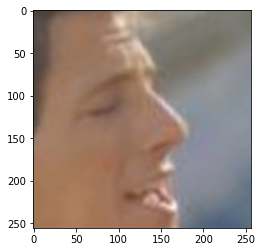

In [74]:
a = make_batch('data/celeba/celeba/img_align_celeba/000003.jpg')

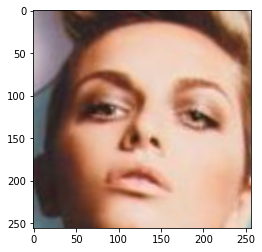

In [75]:
a = make_batch('data/celeba/celeba/img_align_celeba/000005.jpg')

In [76]:
results[0]

tensor([-0.2189,  0.2383,  0.2919, -0.1600,  0.0840,  0.0463,  0.1020,  0.0293,
         0.0065,  0.1898,  0.0260, -0.2232,  0.3146, -0.1700,  0.0290,  0.3894,
         0.0593,  0.0324,  0.2665,  0.2867,  0.3320,  0.1873,  0.0986,  0.1978,
        -0.0220,  0.0765,  0.0460, -0.4083, -0.0011,  0.1254,  0.3213,  0.2112,
        -0.3453,  0.1149,  0.0337,  0.2068, -0.0801, -0.0871, -0.2145, -0.1695,
         0.1024,  0.1870,  0.2025, -0.2822,  0.1864,  0.0753,  0.1599, -0.2239,
         0.1270, -0.0996, -0.0414,  0.1014, -0.1097, -0.0597, -0.2482,  0.0121,
        -0.3283,  0.0408,  0.2041, -0.0224, -0.0205, -0.2069,  0.1470, -0.0457,
         0.0214,  0.3309,  0.1441, -0.3520, -0.0117,  0.2739,  0.1345, -0.1869,
        -0.2248,  0.1918, -0.0187,  0.0094, -0.4757, -0.0309, -0.0803, -0.2116,
        -0.0689,  0.2663, -0.0085, -0.1130, -0.0905,  0.0964,  0.1859, -0.0791,
         0.0007, -0.0831,  0.1193,  0.0309,  0.3895,  0.1142,  0.0461, -0.0049,
        -0.2035, -0.2909,  0.0319, -0.46

In [21]:
from sklearn.datasets import fetch_lfw_people as lfw

lfw_people = lfw(color=True)

In [32]:
X = lfw_people.images

In [23]:
y = lfw_people.target

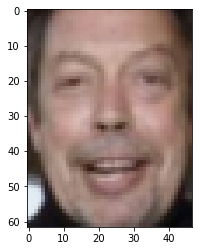

In [41]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.int16(X[0]))

In [26]:
1457 / 31

47.0

In [27]:
n_samples, h, w = lfw_people.images.shape

ValueError: too many values to unpack (expected 3)

In [28]:
imgs = lfw_people.images

In [29]:
imgs.shape

(13233, 62, 47, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


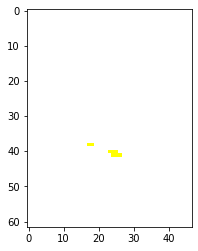

In [31]:
plt.imshow(imgs[3])

In [119]:
from sklearn.datasets import fetch_lfw_pairs as lfw

lfw_pairs = lfw()

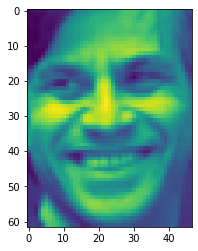

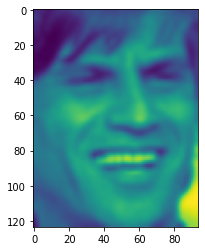

In [171]:
i = 2
a = lfw_pairs.pairs[i,0]
b = lfw_pairs.pairs[i,1]
plt.imshow(b)
plt.show()
lfw_pairs.target[i]
a = cv2.resize(a, (a.shape[1]*2, a.shape[0]*2))
plt.imshow(a)
plt.show()

In [174]:
import cv2
import numpy as np

#Reading an image (you can use PNG or JPG)
#img = cv2.imread("image.png")
img = np.float32(a)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#Getting the bigger side of the image
s = max(img.shape[0:2])

#Creating a dark square with NUMPY  
f = np.zeros((s,s,3),np.uint8)

#Getting the centering position
ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2

#Pasting the 'image' in a centering position
f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img
f = cv2.resize(f, (128, 128))

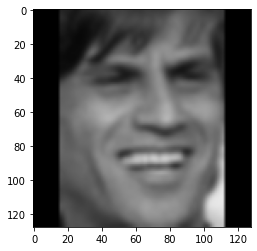

In [175]:
plt.imshow(f)

In [1]:
import albumentations as A
import albumentations.pytorch as Apt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as lin
import torch
import torch.nn.functional as F
import torchvision.transforms as T
from cface.models import ArcFaceExtractor


def paths2batches(img_paths):
    imgs = []
    for i, p in enumerate(img_paths):
        img = cv2.imread(p)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        imgs.append(img)

    batches = []
    cmp = A.Compose([
        A.Normalize(
            mean=(0.485, 0.456, 0.406),
            std=(0.229, 0.224, 0.225),
        ),
        A.CenterCrop(96, 96),
        A.Resize(128, 128),
        Apt.ToTensorV2(),
    ])
    for i, img in enumerate(imgs):
        img = cmp(image=img)['image']
        batch = img[None, ...]
        batches.append(batch)
        
    return batches


threshold = 1.3
model = ArcFaceExtractor(n_classes=10178, head_mode='arcface')
ckpt = torch.load('models/arcface1.0-e20.pt')
model.load_state_dict(ckpt['model_state_dict'])
model.eval()
print('good')


from pathlib import Path

a = Path('/home/sirius/workdir/data/temp/CASIA-WebFace')
ps = [p.name for p in a.glob('*')]
print(len(ps))

RuntimeError: Error(s) in loading state_dict for ArcFaceExtractor:
	Missing key(s) in state_dict: "extractor.classifier.0.bias", "extractor.classifier.2.weight", "extractor.classifier.3.weight", "extractor.classifier.3.bias", "extractor.classifier.3.running_mean", "extractor.classifier.3.running_var". 
	Unexpected key(s) in state_dict: "extractor.classifier.1.weight", "extractor.classifier.1.bias", "extractor.classifier.1.running_mean", "extractor.classifier.1.running_var", "extractor.classifier.1.num_batches_tracked". 
	size mismatch for extractor.classifier.0.weight: copying a param with shape torch.Size([512, 2048]) from checkpoint, the shape in current model is torch.Size([1024, 2048]).

In [1]:
def run_exp(
        ep_num='6',
        model_v='1.1',
        mode='linear',
        threshold=1.3,
        bin_number=100,
    ):
    from pathlib import Path
    import albumentations as A
    import albumentations.pytorch as Apt
    import cv2
    import matplotlib.pyplot as plt
    import numpy as np
    import scipy.linalg as lin
    import torch
    import torch.nn.functional as F
    import torchvision.transforms as T
    from cface.models import ArcFaceExtractor


    def paths2batches(img_paths):
        imgs = []
        for i, p in enumerate(img_paths):
            img = cv2.imread(p)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (128, 128))
            imgs.append(img)

        batches = []
        cmp = A.Compose([
            A.Normalize(
                mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225),
            ),
            A.CenterCrop(96, 96),
            A.Resize(128, 128),
            Apt.ToTensorV2(),
        ])
        for i, img in enumerate(imgs):
            img = cmp(image=img)['image']
            batch = img[None, ...]
            batches.append(batch)

        return batches


    model = ArcFaceExtractor(n_classes=10178, head_mode=mode)
    ckpt = torch.load(f'models/arcface{model_v}-e{ep_num}.pt')
    model.load_state_dict(ckpt['model_state_dict'])
    model.eval()

    a = Path('/home/sirius/workdir/data/temp/CASIA-WebFace')
    ps = [p.name for p in a.glob('*')]
    
    
    def acc_1(dir_path):
        img_paths = []
        for i in range(2, 10):
            idx = '0' * (3 - len(str(i))) + str(i)
            img_path = f'{dir_path}/{idx}.jpg'
            img_paths.append(img_path)

        batches = paths2batches(img_paths)
        results = []
        for i, b in enumerate(batches):
            x = model.extractor(b)
            x = F.normalize(x)[0]
            results.append(x)

        ds_1 = []
        for i, result in enumerate(results):
            for j, result_2 in enumerate(results):
                if i == j:
                    continue
                a = result - result_2
                d = lin.norm(a.detach().numpy())
                ds_1.append(d)

        good = 0
        for d in ds_1:
            if d < threshold:
                good += 1

        return good / len(ds_1)

    rpath = '/home/sirius/workdir/data/temp/CASIA-WebFace'
    dir_indices = ps[bin_number:bin_number+30]

    dir_paths = [f'{rpath}/{idx}' for idx in dir_indices]
    b = 0
    for p in dir_paths:
        b += acc_1(p)

    b /= len(dir_paths)

    def acc_2(idx='003'):
        prefix = '/home/sirius/workdir/data/temp/CASIA-WebFace/'
        dir_indices = ps[:50]

        img_paths = []
        for i in range(8):
            img_path = f'{prefix}{dir_indices[i]}/{idx}.jpg'
            img_paths.append(img_path)

        batches = paths2batches(img_paths)

        results = []
        for i, b in enumerate(batches):
            x = model.extractor(b)
            x = F.normalize(x)[0]
            results.append(x)

        ds = []
        for i, result in enumerate(results):
            for j, result_2 in enumerate(results):
                if i == j:
                    continue
                a = result - result_2
                d = lin.norm(a.detach().numpy())
                ds.append(d)

        good = 0
        for d in ds:
            if d > threshold:
                good += 1

        return good / len(ds)

    indices = ['0'*(3-len(str(i)))+str(i) for i in range(1, 15)]

    a = 0
    for idx in indices:
        a += acc_2(idx)

    a /= len(indices)
    return a, b

In [13]:
import tqdm

a = []
b = []
conf = []

for i in tqdm.tqdm(range(8, 12, 2)):
    for j in range(8):
        t = 1.2 + 0.02*j
        ai, bi = run_exp(
            model_v='1.0',
            ep_num=str(i),
            mode='arcface',
            threshold=t,
            bin_number=0,
        )
        a.append(ai)
        b.append(bi)
        conf.append((ai, bi, i, t))

100%|██████████| 13/13 [21:34<00:00, 99.56s/it] 


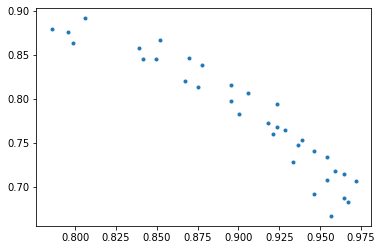

In [12]:
plt.scatter(a, b, marker='.')

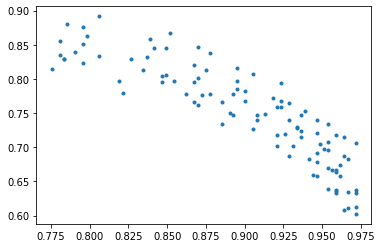

In [14]:
plt.scatter(a, b, marker='.')

In [39]:
import tqdm

a = []
b = []
conf = []

#for i in tqdm.tqdm(range(2, 2+n*2, 2)):
n=20
for i in tqdm.tqdm(range(8, 22, 2)):
    for j in range(10):
        t = 1.2 + 0.02*j
        ai, bi = run_exp(
            model_v='1.6',
            ep_num=i,
            mode='arcface',
            threshold=t,
            bin_number=0,
        )
        a.append(ai)
        b.append(bi)
        conf.append((ai, bi, i, t))

100%|██████████| 7/7 [13:56<00:00, 119.52s/it]


70


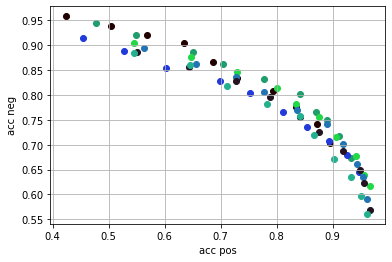

In [42]:
import matplotlib.pyplot as plt

print(len(a))
t = 10
for i in range(n):
    plt.scatter(a[t*i:t*(i+1)], b[t*i:t*(i+1)], color='#'+str(hex(8**7+40301*i))[2:])
plt.grid()
plt.xlabel('acc pos')
plt.ylabel('acc neg')
plt.show()

In [38]:
conf

[(0.9617346938775511, 0.5214285714285715, 8, 1.1),
 (0.9515306122448981, 0.5547619047619048, 8, 1.12),
 (0.9387755102040816, 0.6047619047619047, 8, 1.1400000000000001),
 (0.9311224489795918, 0.6464285714285717, 8, 1.1600000000000001),
 (0.9081632653061223, 0.680952380952381, 8, 1.1800000000000002),
 (0.895408163265306, 0.7023809523809523, 8, 1.2000000000000002),
 (0.8724489795918365, 0.7416666666666667, 8, 1.2200000000000002),
 (0.8341836734693876, 0.775, 8, 1.2400000000000002),
 (0.7933673469387754, 0.8071428571428572, 8, 1.26),
 (0.7295918367346939, 0.8333333333333334, 8, 1.28),
 (0.9770408163265306, 0.4964285714285715, 10, 1.1),
 (0.971938775510204, 0.530952380952381, 10, 1.12),
 (0.9668367346938774, 0.569047619047619, 10, 1.1400000000000001),
 (0.9540816326530612, 0.605952380952381, 10, 1.1600000000000001),
 (0.9464285714285715, 0.6452380952380953, 10, 1.1800000000000002),
 (0.9336734693877551, 0.6738095238095237, 10, 1.2000000000000002),
 (0.9107142857142857, 0.7166666666666666, 1

In [3]:
a = []
b = []
conf = []
for j in range(1):
    t = 1.3
    ai, bi = run_exp(
        model_v='1.5',
        ep_num=12,
        mode='arcface',
        threshold=t,
        bin_number=0,
    )
    a.append(ai)
    b.append(bi)
    conf.append((ai, bi, t))

In [4]:
conf

[(0.8545918367346939, 0.8452380952380951, 1.3)]

In [ ]:
t = 15
for i in range(n):
    plt.scatter(a[t*i:t*(i+1)], b[t*i:t*(i+1)], color='#'+str(hex(8**7+40301*i))[2:])
plt.grid()
plt.show()
conf

In [17]:
import tqdm

a = []
b = []
conf = []

for i in tqdm.tqdm(range(8, 12, 2)):
    for j in range(8):
        t = 1.2 + 0.02*j
        ai, bi = run_exp(
            model_v='1.0',
            ep_num=str(i),
            mode='arcface',
            threshold=t,
            bin_number=0,
        )
        a.append(ai)
        b.append(bi)
        conf.append((ai, bi, i, t))

100%|██████████| 2/2 [03:27<00:00, 103.80s/it]


[(0.6020408163265306, 0.8857142857142859, 2, 1.2),
 (0.5841836734693878, 0.8964285714285716, 2, 1.22),
 (0.5510204081632654, 0.9035714285714287, 2, 1.24),
 (0.5229591836734693, 0.9142857142857144, 2, 1.26),
 (0.49744897959183676, 0.9297619047619048, 2, 1.28),
 (0.45153061224489793, 0.9416666666666665, 2, 1.3),
 (0.413265306122449, 0.9428571428571428, 2, 1.3199999999999998),
 (0.3903061224489796, 0.9523809523809524, 2, 1.3399999999999999),
 (0.7270408163265305, 0.8273809523809524, 4, 1.2),
 (0.7066326530612244, 0.8333333333333334, 4, 1.22),
 (0.6683673469387754, 0.8452380952380951, 4, 1.24),
 (0.6403061224489796, 0.861904761904762, 4, 1.26),
 (0.5994897959183673, 0.875, 4, 1.28),
 (0.5663265306122449, 0.8869047619047616, 4, 1.3),
 (0.528061224489796, 0.9, 4, 1.3199999999999998),
 (0.5051020408163265, 0.9083333333333333, 4, 1.3399999999999999),
 (0.6785714285714286, 0.8916666666666668, 6, 1.2),
 (0.6479591836734694, 0.8952380952380953, 6, 1.22),
 (0.625, 0.9011904761904763, 6, 1.24),
 (0

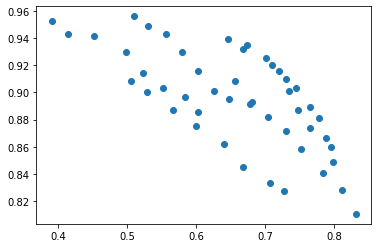

In [4]:
import matplotlib.pyplot as plt

plt.scatter(a, b)
conf

In [20]:
import tqdm

a = []
b = []
conf = []

for j in range(8):
    t = 1.2 + 0.02*j
    ai, bi = run_exp(
        model_v='1.2',
        ep_num=str(2),
        mode='arcface',
        threshold=t,
        bin_number=0,
    )
    a.append(ai)
    b.append(bi)
    conf.append((ai, bi, i, t))

RuntimeError: Error(s) in loading state_dict for ArcFaceExtractor:
	Missing key(s) in state_dict: "extractor.classifier.1.weight", "extractor.classifier.1.bias", "extractor.classifier.1.running_mean", "extractor.classifier.1.running_var". 
	Unexpected key(s) in state_dict: "extractor.classifier.2.weight", "extractor.classifier.3.weight", "extractor.classifier.3.bias", "extractor.classifier.3.running_mean", "extractor.classifier.3.running_var", "extractor.classifier.3.num_batches_tracked", "extractor.classifier.0.bias". 
	size mismatch for extractor.classifier.0.weight: copying a param with shape torch.Size([1024, 2048]) from checkpoint, the shape in current model is torch.Size([512, 2048]).